<a href="https://colab.research.google.com/github/Prakface/Practice/blob/master/Using_keras_for_prediction_for_our_core_main_heuristic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

In [4]:
#Importing Data

import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import math
from torch.autograd import Variable


#url='https://raw.githubusercontent.com/Prakface/Practice/master/One_mon_present_full.csv'
#url2='https://raw.githubusercontent.com/Prakface/Practice/master/Final_one_month_prev_features.csv'


#following is path data with user-IDs
url='https://raw.githubusercontent.com/Prakface/Practice/master/OneMonth_Present_Final_both_classes.csv'

url2='https://raw.githubusercontent.com/Prakface/Practice/master/OneMonthPrevFeatures2_USER_ID.csv'

url_h='https://raw.githubusercontent.com/Prakface/Practice/master/heuristic_labels.csv'

url_h_main='https://raw.githubusercontent.com/Prakface/Practice/master/Heuristics_labels_including_core_label.csv'

data = pd.read_csv(url) 

data2= pd.read_csv(url2)

print("Data Shape:", data.shape) 

#data=pd.read_csv(url)

df=pd.DataFrame(data)
print(data.head()) 


data_modified= data.dropna()

data_modified.to_csv("modifiedData.csv", index=False)


df2=pd.read_csv("modifiedData.csv")

print(df2[0:6])

print(df2['result'])

df_main=df2[df2.columns[~df2.columns.isin(['text', 'user_name'])]]

print(df_main.columns)

print(len(df_main.columns))

  
# X_1, y_1 means rpesent tweets' data
X_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_1=X_1.iloc[:,1:len(X_1.columns)].values   #removing the unnamed attribute
x_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x_1=x_1.iloc[:,1:len(x_1.columns)].values 
y_1=df_main.loc[:, ['result']].values


print(type(X_1), type(y_1), type(x_1), type(y_1))

print(X_1.shape)
print(y_1.shape)




print("\n the following is for previous data sets")


data2= pd.read_csv(url2)

print("Data Shape:", data2.shape) 

#data=pd.read_csv(url)

df_prev=pd.DataFrame(data2)
print(data2.head()) 


data2_modified= data2.dropna()

data2_modified.to_csv("modifiedData2.csv", index=False)


df_2=pd.read_csv("modifiedData2.csv")

print(df_2[0:6])

print(df_2['result'])

df_main2=df_2[df_2.columns[~df_2.columns.isin(['text', 'user_name'])]]

print(df_main2.columns)

print(len(df_main2.columns))

  

X_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_2=X_2.iloc[:,1:len(X_2.columns)].values   #removing the unnamed attribute
x_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]]
x_2=x_2.iloc[:,1:len(x_2.columns)].values 
y_2=df_main2.loc[:, ['result']].values


print(type(X_2), type(y_2), type(x_2), type(y_2))

print(X_2.shape)
print(y_2.shape)

Data Shape: (1879, 40)
     Users_ID cat1  cat10  ...      tweet_id  url      user_name
0   205281515    0      0  ...  8.323790e+17  0.0  THEJEROMEOWEN
1   571989630    0      0  ...  8.323786e+17  0.0       Acejinjo
2   469678667    0      0  ...  8.323780e+17  0.0     RabRakha21
3  2858633976    0      0  ...  8.323777e+17  0.0       RS_Aloha
4   955893199    0      0  ...  8.323767e+17  0.0  preciselyizzy

[5 rows x 40 columns]
     Users_ID  cat1  cat10  ...      tweet_id  url        user_name
0   205281515     0      0  ...  8.323790e+17  0.0    THEJEROMEOWEN
1   571989630     0      0  ...  8.323786e+17  0.0         Acejinjo
2   469678667     0      0  ...  8.323780e+17  0.0       RabRakha21
3  2858633976     0      0  ...  8.323777e+17  0.0         RS_Aloha
4   955893199     0      0  ...  8.323767e+17  0.0    preciselyizzy
5   115498371     0      0  ...  8.323759e+17  0.0  thefireistarted

[6 rows x 40 columns]
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
     

In [8]:
##With actual labels , importing heuristic labels

import pandas as pd
import numpy as np

df_h=pd.read_csv(url_h_main)

print(df_h.columns)


'''
the following way is wrong
label1=df_h.heuristic1.values
label_1=df_h.heuristic1_1.values
label2=df_h.heuristic2.values
label3=df_h.heuristic3.values

print(type(label1), type(label2), type(label3))



print(type(label1), type(label2), type(label3))

print(y_1.shape, label1.shape, label2.shape, label3.shape)

#print(len(label1),len(label2),len(label3), len(label_1))

'''




label1=df_h.loc[:, ['heuristic1']].values
label_1=df_h.loc[:,['heuristic1_1']].values
label2=df_h.loc[:, ['heuristic2']].values
label3=df_h.loc[:, ['heuristic3']].values

label_main=df_h.loc[:,['heuristic_core_main']]

print(type(label1), type(label2), type(label3))



print(type(label1), type(label2), type(label3))

print(y_1.shape, label1.shape, label2.shape, label3.shape)


tem1y=np.append(y_1, label1, axis=0)
tem2y=np.append(y_1, label2, axis=0)
tem3y=np.append(y_1, label3, axis=0)

tem_1y=np.append(y_1, label_1, axis=0)

tem_main_y=np.append(y_1, label_main, axis=0)
heu_main=label_main


Index(['Unnamed: 0', 'Unnamed: 0.1', 'heuristic1', 'heuristic1_1',
       'heuristic2', 'heuristic3', 'heuristic_core_main'],
      dtype='object')
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1877, 1) (3273, 1) (3273, 1) (3273, 1)


In [0]:
import sklearn
from sklearn.model_selection import train_test_split

##Appending the present and previous tweets into one frame (heuristic_main)

#Appending the features and labels
##Before applying PCA

import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
X=np.concatenate((X_1,X_2), axis=0)
#y_prev=tem1y

#y=np.concatenate((y_1,y_prev), axis=0)

#y=tem1y
#y=tem2y
#y=tem3y
#y=tem_1y
y=tem_main_y
x_tr,x_valid,y_tr,y_valid=train_test_split(X,y,test_size=0.2)


## for multi-class (>=2) classification, the shape of the label should be in the form of (N,m), where N=num_of_data points(rows)
## m= number of labels

from keras.utils import to_categorical
y_labels = to_categorical(y_tr)

#y_labels2 = to_categorical(y_tr2)


y_valid_labels=to_categorical(y_valid)

#y_pred_bool = np.argmax(y_pred, axis=1)


#y_valid_labels2=to_categorical(y_valid2)









In [11]:


###Prediction 
##The y labels are based on heuristic main

x_tr_pres,x_valid_pres,y_tr_pres,y_valid_pres=train_test_split(X_1,y_1,test_size=0.2)
x_tr_prev,x_valid_prev,y_tr_prev,y_valid_prev=train_test_split(X_2,heu_main,test_size=0.2)

x_tr=np.concatenate((x_tr_pres,x_tr_prev), axis=0)
x_valid=np.concatenate((x_valid_pres, x_valid_prev), axis=0)

y_tr=np.concatenate((y_tr_pres,y_tr_prev), axis=0)
y_valid=np.concatenate((y_valid_pres, y_valid_prev), axis=0)


###Using X_1_new and X_2_new, for generating user IDs based 
##TO DEMONSTRATE THAT IT 
X_1_new=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]

X_2_new=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]]



##Appending the present and previous tweets into one frame (prev labels = all are 0s)

#Appending the features and labels
##Before applying PCA

import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
#X_new=np.concatenate((X_1_new,X_2_new), axis=0)
#y_new=np.concatenate((y_1,y_2), axis=0)


x_pres_tr_tmp,x_pres_valid_tmp,y_pres_tr_tmp,y_pres_valid_tmp=train_test_split(X_1_new,y_1,test_size=0.2) 

print(type(x_pres_tr_tmp), type(x_pres_valid_tmp))

#To Convert into numpy arrays

x_pres_tr_new=x_pres_tr_tmp.values
x_pres_valid_new=x_pres_valid_tmp.values

x_pres_tmp_lst=list(x_pres_tr_new)
x_pres_valid_tmp=list(x_pres_valid_new)

print(type(x_pres_tmp_lst), type(x_pres_tmp_lst))


X_pres_tr_df=pd.DataFrame(x_pres_tmp_lst, columns=df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])])
X_pres_valid_df=pd.DataFrame(x_pres_valid_tmp, columns= df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])])





#X_prev_df=pd.DataFrame(x_prev_tmp_lst, columns=df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])
#X_prev_valid_df=pd.DataFrame(x_prev_valid_tmp, columns= df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])

#For each ID in present training list select a tuple from previous tweets, that has matching Users_ID

matching_prev_twts_tr=[]
matching_prev_twts_valid=[]

matching_y_prev_tr=[]
matching_y_prev_valid=[]

match_cnt=0
index_cnt=0

for i in X_pres_tr_df['Users_ID']:
  match_cnt=0
  index_cnt=0
  for j in X_2_new['Users_ID']:
    if(match_cnt>0):
      break
    elif(i==j and match_cnt==0):
      matching_prev_twts_tr.append(X_2_new.iloc[index_cnt, :])  #copying row corresponding to current  index (with all columns)

      matching_y_prev_tr.append(y_2[index_cnt])

      match_cnt+=1
      
      index_cnt+=1
    else:
      index_cnt+=1
      #print("\n--different path--\n")



for i in X_pres_valid_df['Users_ID']:
  match_cnt=0
  index_cnt=0
  for j in X_2_new['Users_ID']:
    if(match_cnt>0):
      break
    elif(i==j and match_cnt==0):
      matching_prev_twts_valid.append(X_2_new.iloc[index_cnt, :])

      matching_y_prev_valid.append(y_2[index_cnt])


      match_cnt+=1
      index_cnt+=1
    else:
      index_cnt+=1
      #print("\n--different path--\n")


print("\n type of matching tweets", type(matching_prev_twts_tr))
print("\n the lengths of present tweets training = ", len(X_pres_tr_df), "\n length of matching previous tweets for training=", len(matching_prev_twts_tr))

print("\n the lengths of present tweets testing = ", len(X_pres_valid_df), "\n length of matching previous tweets for testing=", len(matching_prev_twts_valid))

print("\n lengths of matched previous labels training = ", len(matching_y_prev_tr),"\n lengths of matched previous labels testing = ", len(matching_y_prev_valid))


#x_tr,x_valid,y_tr,y_valid=train_test_split(X,y,test_size=0.2)

#for i in x_pres_tr_new['Users_ID']


#X_pres_tmp




#creating data frames from matching lists.
X_prev_tr_df=pd.DataFrame(matching_prev_twts_tr, columns=df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])

X_prev_valid_df=pd.DataFrame(matching_prev_twts_valid, columns= df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])



<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'list'> <class 'list'>

 type of matching tweets <class 'list'>

 the lengths of present tweets training =  1501 
 length of matching previous tweets for training= 1307

 the lengths of present tweets testing =  376 
 length of matching previous tweets for testing= 327

 lengths of matched previous labels training =  1307 
 lengths of matched previous labels testing =  327


In [12]:
## we have less previous tweets compared to present tweets in matched points, 
## Using the matched previous tweets, Select the present tweets in trianing, which have matching IDs with matched previous tweets (so as to make both present and previous tweets equal in num)


##Create temporary dataframes or lists.
print(type(X_2_new.iloc[2,:]))

min_match_rows_appended=[]
min_match_cols_appended=[]

min_matched_pres_tr=[]
min_matched_pres_valid=[]

min_y_prev_tr=[]
min_y_prev_valid=[]

'''

final_min_matched_prev_tr=[]
final_min_matched_prev_valid=[]

prev_index=0
for i in X_prev_tr_df['Users_ID']:
  pres_index=0
  for j in X_pres_tr_df['Users_ID']:
    if(i==j):
      final_min_matched_prev.append()
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    else:
      prev_index+=1
  pres_index+=1
'''

'''
match_flag=0

for i in X_pres_tr_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_prev_tr_df['Users_ID']:
    if(i==j and match_flag==0):
      final_min_matched_prev_tr.append(X_prev_tr_df.iloc[index, :])
      match_flag=1
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    else:
      index+=1
      




match_flag=0
for i in X_pres_valid_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_prev_valid_df['Users_ID']:
    if(i==j):
      final_min_matched_prev_valid.append(X_prev_valid_df.iloc[index, :])
      match_flag=1
      #min_match_rows_appended.append(X_pres_valid_df.iloc[])
    else:
      index+=1


This above  logic is not good as it is selects the previous matched tweets again.
      
           
      
                      
print("\n the min matched lengths are for present training = \n",len(X_pres_tr_df) ,"\n for previous training =", len(final_min_matched_prev_tr))

'''

#Using Break 

for i in X_prev_tr_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_pres_tr_df['Users_ID']:
    if(i==j):
      min_matched_pres_tr.append(X_pres_tr_df.iloc[index, :])
      break
      #print("train")
      
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    #else:
    #  index+=1
    index+=1

for i in X_prev_valid_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_pres_valid_df['Users_ID']:
    if(i==j):
      min_matched_pres_valid.append(X_pres_valid_df.iloc[index, :])
      break
      
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    #else:
    #  index+=1
    index+=1


print("\n the min matched lengths are for previous training = \n",len(X_prev_tr_df) ,"\n for new present training =", len(min_matched_pres_tr))

##In other way, using flags instead of break
min_matched_pres_tr=[]
min_matched_pres_valid=[]

min_y_pres_tr=[]
min_y_pres_valid=[]

prev_index=0
for i in X_prev_tr_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_pres_tr_df['Users_ID']:
    if(i==j and match_flag==0):
      min_matched_pres_tr.append(X_pres_tr_df.iloc[prev_index, :])
      #print("train")
      match_flag=1
      min_y_pres_tr.append(y_pres_tr_tmp[index])
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    else:
      index+=1
  
  prev_index+=1


prev_index=0
for i in X_prev_valid_df['Users_ID']:
  index=0
  match_flag=0
  for j in X_pres_valid_df['Users_ID']:
    if(i==j and match_flag==0 ):
      min_matched_pres_valid.append(X_pres_valid_df.iloc[index, :])
      
      min_y_pres_valid.append(y_pres_valid_tmp[index])
      match_flag=1
      #min_match_rows_appended.append(X_pres_tr_df.iloc[])
    else:
      index+=1
  prev_index+=1


print("\n the min matched lengths are for previous training = ",len(X_prev_tr_df) ,"\n for new present training =", len(min_matched_pres_tr))
print("\n the min match lengths for labels of previous training = ", len(matching_y_prev_tr), "\n the min match lengths for labels for present training = ", len(min_y_pres_tr))



print("\n the min matched lengths are for previous validation = ",len(X_prev_valid_df) ,"\n for new present validation =", len(min_matched_pres_valid))
print("\n the min match lengths for labels of previous validation = ", len(matching_y_prev_valid), "\n the min match lengths for labels for present validation = ", len(min_y_pres_valid))


<class 'pandas.core.series.Series'>

 the min matched lengths are for previous training = 
 1307 
 for new present training = 1307

 the min matched lengths are for previous training =  1307 
 for new present training = 1307

 the min match lengths for labels of previous training =  1307 
 the min match lengths for labels for present training =  1307

 the min matched lengths are for previous validation =  327 
 for new present validation = 327

 the min match lengths for labels of previous validation =  327 
 the min match lengths for labels for present validation =  327


In [13]:
min_pres_tr_df=pd.DataFrame(min_matched_pres_tr, columns=df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])

min_pres_valid_df=pd.DataFrame(min_matched_pres_valid, columns=df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])])

#min_pres_tr_df, min_pres_valid_df, X_prev_tr_df, X_prev_valid_df are our train and test splits for presenr and previous  tweets

#NOW REMOVE the UserIDs columns and so as to make them usable for training the model

new_min_pres_tr_df=pd.DataFrame(min_pres_tr_df, columns=min_pres_tr_df.columns[~min_pres_tr_df.columns.isin(['Users_ID'])])

new_min_pres_valid_df=pd.DataFrame(min_pres_valid_df, columns=min_pres_valid_df.columns[~min_pres_valid_df.columns.isin(['Users_ID'])])

new_X_prev_tr_df=pd.DataFrame(X_prev_tr_df, columns= X_prev_tr_df.columns[~X_prev_tr_df.columns.isin(['Users_ID'])])

new_X_prev_valid_df=pd.DataFrame(X_prev_valid_df, columns= X_prev_valid_df.columns[~X_prev_valid_df.columns.isin(['Users_ID'])])


#
new_X_pres_tr= new_min_pres_tr_df.iloc[:,:].values
new_X_pres_valid= new_min_pres_valid_df.iloc[:,:].values
new_X_prev_tr= new_X_prev_tr_df.iloc[:,:].values
new_X_prev_valid= new_X_prev_valid_df.iloc[:,:].values



new_y_pres_tr=np.array(min_y_pres_tr)
new_y_prev_tr=np.array(matching_y_prev_tr)
new_y_pres_valid=np.array(min_y_pres_valid)
new_y_prev_valid=np.array(matching_y_prev_valid)

print("\n shapes of training set of labels for present and previous  ",new_y_pres_tr.shape, new_y_prev_tr.shape)
print("\n shapes of validation set of labels for present and previous  ", new_y_pres_valid.shape, new_y_prev_valid.shape)


import numpy as np
new_X_tr=np.concatenate((new_X_pres_tr, new_X_prev_tr), axis=0)
new_X_valid=np.concatenate((new_X_pres_valid, new_X_prev_valid), axis=0)

new_y_tr=np.concatenate((new_y_pres_tr, new_y_prev_tr), axis=0)
new_y_valid=np.concatenate((new_y_pres_valid, new_y_prev_valid), axis=0)

#convert into ndarray and build the model
from keras.utils import to_categorical
y_tr_labels = to_categorical(new_y_tr)

#y_labels2 = to_categorical(y_tr2)


y_valid_labels=to_categorical(new_y_valid)



y_pres_tr_labels = to_categorical(new_y_pres_tr)
y_pres_valid_labels=to_categorical(new_y_pres_valid)

y_prev_tr_labels = to_categorical(new_y_prev_tr)
y_prev_valid_labels=to_categorical(new_y_prev_valid)


#y_pred_bool = np.argmax(y_pred, axis=1)



print("\n shapes of training set of labels for present and previous  ",y_pres_tr_labels.shape, y_prev_tr_labels.shape)
print("\n shapes of validation set of labels for present and previous  ", y_pres_valid_labels.shape, y_prev_valid_labels.shape)



 shapes of training set of labels for present and previous   (1307, 1) (1307, 1)

 shapes of validation set of labels for present and previous   (327, 1) (327, 1)

 shapes of training set of labels for present and previous   (1307, 2) (1307, 1)

 shapes of validation set of labels for present and previous   (327, 2) (327, 1)


In [0]:
print(len(new_X_tr),  len(y_tr_labels), len(new_X_valid), len(y_valid_labels))


2612 2612 656 656







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2614 samples, validate on 654 samples
Epoch 1/100





2614/2614 [==============================] - 19s 7ms/step - loss: 1.0066 - acc: 0.6637 - val_loss: 1.3500 - val_acc: 0.6606
Epoch 2/100
2614/2614 [==============================] - 0s 83us/step - loss: 0.9201 - acc: 0.6840 - val_loss: 0.8043 - val_acc: 0.7080
Epoch 3/100
2614/2614 [==============================] - 0s 88us/step - loss: 0.6845 - acc: 0.7414 - val_loss: 0.6959 - val_acc: 0.7385
Epoch 4/100
2614/2614 [==============================] - 0s 100us/step - loss: 0.6231 - acc: 0.7422 - val_loss: 0.7107 - val_acc: 0.7477
Epoch 5/100
2614/2614 [==============================] - 0s 85us/step - loss: 0.6018 - acc: 0.7445 - val_loss: 0.6265 - val_acc: 0.7049
Epoch 6/100
2614/2614 [==============================] - 0s 80us/step - loss: 0.5790 - acc: 0.7445 - val_loss: 0.6217 - val_acc: 0.6865
Epoch 7/100
2614/2614 [======

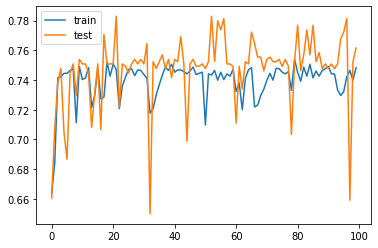

In [14]:
#Training the model with this ORCHESTRATED DATASET, (existing prediction)
##ONLY normal way of prediction
##With regularization and with precision and accuracy scores, classification report.and plots
import matplotlib
from matplotlib import pyplot

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
"""
Now, we Set up the logistic regression model with y_labels1 and  y_valid_labels1, the changed labels
"""
model = Sequential()
feature_vector=new_X_tr[1] #(any row of training data set)
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=len(feature_vector)))  # input dimension = number of features your data has
          

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(new_X_tr, y_tr_labels, epochs=100, validation_data=(new_X_valid, y_valid_labels))


y_pred = model.predict(new_X_valid, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("\n Classification Report, \n", classification_report(new_y_valid, y_pred_bool), "\n")
print("\n Macro scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account

print("\n Micro Scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.

print("\n weighted Scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label





pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train on 2614 samples, validate on 654 samples
Epoch 1/100
2614/2614 [==============================] - 0s 125us/step - loss: 0.9605 - acc: 0.6714 - val_loss: 0.6621 - val_acc: 0.6009
Epoch 2/100
2614/2614 [==============================] - 0s 82us/step - loss: 0.6532 - acc: 0.7150 - val_loss: 0.9623 - val_acc: 0.6850
Epoch 3/100
2614/2614 [==============================] - 0s 92us/step - loss: 0.6968 - acc: 0.7024 - val_loss: 0.5716 - val_acc: 0.7538
Epoch 4/100
2614/2614 [==============================] - 0s 80us/step - loss: 0.5419 - acc: 0.7284 - val_loss: 0.5740 - val_acc: 0.7401
Epoch 5/100
2614/2614 [==============================] - 0s 73us/step - loss: 0.5273 - acc: 0.7368 - val_loss: 0.5322 - val_acc: 0.7569
Epoch 6/100
2614/2614 [==============================] - 0s 90us/step - loss: 0.5226 - acc: 0.7353 - val_loss: 0.5631 - val_acc: 0.7599
Epoch 7/100
2614/2614 [==============================] - 0s 81us/step - loss: 0.5314 - acc: 0.7307 - val_loss: 0.6351 - val_acc: 0.7584


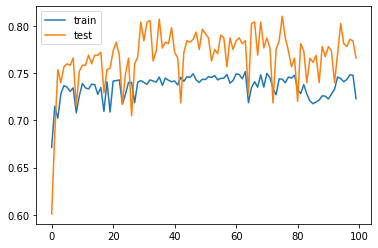

In [15]:
#Training the model with this ORCHESTRATED DATASET, (existing prediction)
##ONLY normal way of prediction, without regularization
##With regularization and with precision and accuracy scores, classification report.and plots
import matplotlib
from matplotlib import pyplot

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
"""
Now, we Set up the logistic regression model with y_labels1 and  y_valid_labels1, the changed labels
"""
model = Sequential()
feature_vector=new_X_tr[1] #(any row of training data set)
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                
                input_dim=len(feature_vector)))  # input dimension = number of features your data has
          

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(new_X_tr, y_tr_labels, epochs=100, validation_data=(new_X_valid, y_valid_labels))


y_pred = model.predict(new_X_valid, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("\n Classification Report, \n", classification_report(new_y_valid, y_pred_bool), "\n")
print("\n Macro scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account

print("\n Micro Scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.

print("\n weighted Scores = \n")
print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label





pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train on 2614 samples, validate on 654 samples
Epoch 1/100
2614/2614 [==============================] - 0s 132us/step - loss: 1.1076 - acc: 0.6928 - val_loss: 0.8915 - val_acc: 0.7385
Epoch 2/100
2614/2614 [==============================] - 0s 83us/step - loss: 0.7797 - acc: 0.7299 - val_loss: 0.7609 - val_acc: 0.7431
Epoch 3/100
2614/2614 [==============================] - 0s 97us/step - loss: 0.9453 - acc: 0.6963 - val_loss: 0.8625 - val_acc: 0.7018
Epoch 4/100
2614/2614 [==============================] - 0s 87us/step - loss: 0.8143 - acc: 0.7131 - val_loss: 0.9541 - val_acc: 0.6820
Epoch 5/100
2614/2614 [==============================] - 0s 91us/step - loss: 0.6964 - acc: 0.7261 - val_loss: 0.6378 - val_acc: 0.7462
Epoch 6/100
2614/2614 [==============================] - 0s 85us/step - loss: 0.5928 - acc: 0.7445 - val_loss: 0.5936 - val_acc: 0.7431
Epoch 7/100
2614/2614 [==============================] - 0s 100us/step - loss: 0.5669 - acc: 0.7429 - val_loss: 0.5754 - val_acc: 0.7462

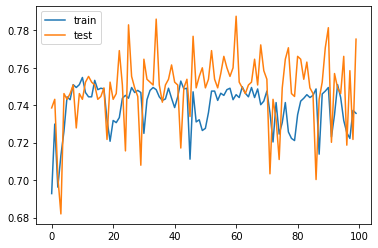

In [17]:
##Combining the data from present and previous training and testing data to use for our custom prediction

#CUSTOM PREDICTION, with regularization

#first convert h

#Training the model with this ORCHESTRATED DATASET,

##With regularization and with precision and accuracy scores, classification report.and plots
import matplotlib
from matplotlib import pyplot

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
"""
Now, we Set up the logistic regression model with y_labels1 and  y_valid_labels1, the changed labels
"""
model = Sequential()
feature_vector=new_X_tr[1] #(any row of training data set)
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=len(feature_vector)))  # input dimension = number of features your data has
          

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(new_X_tr, y_tr_labels, epochs=100, validation_data=(new_X_valid, y_valid_labels))


y_pred1 = model.predict(new_X_pres_valid, batch_size=64, verbose=1)
y_pred2 = model.predict(new_X_prev_valid, batch_size=64, verbose=1)

y_pred=(y_pred1+y_pred2)/2
y_pred_bool = np.argmax(y_pred, axis=1)

'''
shape_of_tmp1=y_tmp1.shape
print("\n",  type(shape_of_tmp1), "\n Accessing shape tuple,dimension 1 (rows)= ", shape_of_tmp1[0], "\n dmension 2 (cols) = ", shape_of_tmp1[1])
length=shape_of_tmp1[0]
y_tmp2_modified=y_tmp2[0:length]

y_pred=(2*y_tmp1*y_tmp2_modified)/(y_tmp1+y_tmp2_modified)
#y_pred= (y_tmp1+y_tmp2_modified)/2
y_pred_bool = np.argmax(y_pred, axis=1)

'''
print("\n Classification Report, \n", classification_report(new_y_pres_valid, y_pred_bool), "\n")
#print("\n Classification Report, \n", classification_report(new_y_valid, y_pred_bool), "\n")


print("\n Macro scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account
#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account

print("\n Micro Scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.
#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.

print("\n weighted Scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label

#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label





pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train on 2614 samples, validate on 654 samples
Epoch 1/100
2614/2614 [==============================] - 0s 152us/step - loss: 1.0797 - acc: 0.6438 - val_loss: 0.9533 - val_acc: 0.6315
Epoch 2/100
2614/2614 [==============================] - 0s 87us/step - loss: 0.8307 - acc: 0.6974 - val_loss: 0.8169 - val_acc: 0.6881
Epoch 3/100
2614/2614 [==============================] - 0s 89us/step - loss: 0.7320 - acc: 0.7204 - val_loss: 0.7738 - val_acc: 0.5734
Epoch 4/100
2614/2614 [==============================] - 0s 92us/step - loss: 0.6760 - acc: 0.7364 - val_loss: 0.6647 - val_acc: 0.7431
Epoch 5/100
2614/2614 [==============================] - 0s 105us/step - loss: 0.6208 - acc: 0.7502 - val_loss: 0.6388 - val_acc: 0.7446
Epoch 6/100
2614/2614 [==============================] - 0s 83us/step - loss: 0.6015 - acc: 0.7399 - val_loss: 0.6379 - val_acc: 0.7431
Epoch 7/100
2614/2614 [==============================] - 0s 83us/step - loss: 0.5734 - acc: 0.7479 - val_loss: 0.6190 - val_acc: 0.7446

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


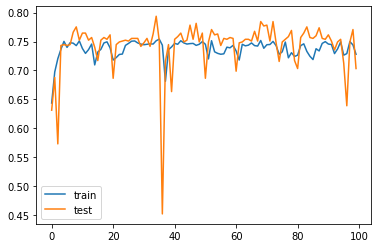

In [18]:
##Combining the data from present and previous training and testing data to use for our custom prediction

##USING HARMONIC MEAN

#first convert h

#Training the model with this ORCHESTRATED DATASET,

##With regularization and with precision and accuracy scores, classification report.and plots
import matplotlib
from matplotlib import pyplot

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
"""
Now, we Set up the logistic regression model with y_labels1 and  y_valid_labels1, the changed labels
"""
model = Sequential()
feature_vector=new_X_tr[1] #(any row of training data set)
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=len(feature_vector)))  # input dimension = number of features your data has
          

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(new_X_tr, y_tr_labels, epochs=100, validation_data=(new_X_valid, y_valid_labels))


y_pred1 = model.predict(new_X_pres_valid, batch_size=64, verbose=1)
y_pred2 = model.predict(new_X_prev_valid, batch_size=64, verbose=1)

#y_pred=(y_pred1+y_pred2)/2
y_pred=(2*y_pred1*y_pred2)/(y_pred1 + y_pred2)
y_pred_bool = np.argmax(y_pred, axis=1)

'''
shape_of_tmp1=y_tmp1.shape
print("\n",  type(shape_of_tmp1), "\n Accessing shape tuple,dimension 1 (rows)= ", shape_of_tmp1[0], "\n dmension 2 (cols) = ", shape_of_tmp1[1])
length=shape_of_tmp1[0]
y_tmp2_modified=y_tmp2[0:length]

y_pred=(2*y_tmp1*y_tmp2_modified)/(y_tmp1+y_tmp2_modified)
#y_pred= (y_tmp1+y_tmp2_modified)/2
y_pred_bool = np.argmax(y_pred, axis=1)

'''
print("\n Classification Report, \n", classification_report(new_y_pres_valid, y_pred_bool), "\n")
#print("\n Classification Report, \n", classification_report(new_y_valid, y_pred_bool), "\n")


print("\n Macro scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account
#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account

print("\n Micro Scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.
#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.

print("\n weighted Scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label

#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label





pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train on 2614 samples, validate on 654 samples
Epoch 1/100
2614/2614 [==============================] - 0s 170us/step - loss: 0.7397 - acc: 0.6859 - val_loss: 0.6595 - val_acc: 0.6972
Epoch 2/100
2614/2614 [==============================] - 0s 81us/step - loss: 0.5688 - acc: 0.6970 - val_loss: 0.5831 - val_acc: 0.7187
Epoch 3/100
2614/2614 [==============================] - 0s 77us/step - loss: 0.5568 - acc: 0.7093 - val_loss: 0.5831 - val_acc: 0.7294
Epoch 4/100
2614/2614 [==============================] - 0s 74us/step - loss: 0.5535 - acc: 0.7127 - val_loss: 0.5961 - val_acc: 0.7431
Epoch 5/100
2614/2614 [==============================] - 0s 96us/step - loss: 0.5460 - acc: 0.7234 - val_loss: 0.5610 - val_acc: 0.7217
Epoch 6/100
2614/2614 [==============================] - 0s 116us/step - loss: 0.5313 - acc: 0.7234 - val_loss: 0.5472 - val_acc: 0.7339
Epoch 7/100
2614/2614 [==============================] - 0s 119us/step - loss: 0.5390 - acc: 0.7238 - val_loss: 0.5372 - val_acc: 0.737

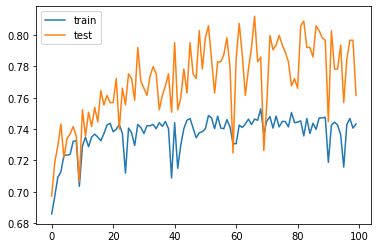

In [20]:
##Combining the data from present and previous training and testing data to use for our custom prediction

#CUSTOM PREDICTION, without regularization

#first convert h

#Training the model with this ORCHESTRATED DATASET,

##With regularization and with precision and accuracy scores, classification report.and plots
import matplotlib
from matplotlib import pyplot

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
"""
Now, we Set up the logistic regression model with y_labels1 and  y_valid_labels1, the changed labels
"""
model = Sequential()
feature_vector=new_X_tr[1] #(any row of training data set)
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                
                input_dim=len(feature_vector)))  # input dimension = number of features your data has
          

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(new_X_tr, y_tr_labels, epochs=100, validation_data=(new_X_valid, y_valid_labels))


y_pred1 = model.predict(new_X_pres_valid, batch_size=64, verbose=1)
y_pred2 = model.predict(new_X_prev_valid, batch_size=64, verbose=1)

y_pred=(y_pred1+y_pred2)/2
y_pred_bool = np.argmax(y_pred, axis=1)

'''
shape_of_tmp1=y_tmp1.shape
print("\n",  type(shape_of_tmp1), "\n Accessing shape tuple,dimension 1 (rows)= ", shape_of_tmp1[0], "\n dmension 2 (cols) = ", shape_of_tmp1[1])
length=shape_of_tmp1[0]
y_tmp2_modified=y_tmp2[0:length]

y_pred=(2*y_tmp1*y_tmp2_modified)/(y_tmp1+y_tmp2_modified)
#y_pred= (y_tmp1+y_tmp2_modified)/2
y_pred_bool = np.argmax(y_pred, axis=1)

'''
print("\n Classification Report, \n", classification_report(new_y_pres_valid, y_pred_bool), "\n")
#print("\n Classification Report, \n", classification_report(new_y_valid, y_pred_bool), "\n")


print("\n Macro scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account
#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account

print("\n Micro Scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.
#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.

print("\n weighted Scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label

#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label





pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train on 2614 samples, validate on 654 samples
Epoch 1/100
2614/2614 [==============================] - 0s 175us/step - loss: 0.6566 - acc: 0.6744 - val_loss: 0.6986 - val_acc: 0.6575
Epoch 2/100
2614/2614 [==============================] - 0s 80us/step - loss: 0.6053 - acc: 0.6813 - val_loss: 0.6429 - val_acc: 0.6636
Epoch 3/100
2614/2614 [==============================] - 0s 84us/step - loss: 0.5744 - acc: 0.7008 - val_loss: 0.6779 - val_acc: 0.5581
Epoch 4/100
2614/2614 [==============================] - 0s 97us/step - loss: 0.5812 - acc: 0.7066 - val_loss: 0.6039 - val_acc: 0.7339
Epoch 5/100
2614/2614 [==============================] - 0s 100us/step - loss: 0.5660 - acc: 0.7192 - val_loss: 0.5676 - val_acc: 0.7554
Epoch 6/100
2614/2614 [==============================] - 0s 93us/step - loss: 0.5571 - acc: 0.7215 - val_loss: 0.6307 - val_acc: 0.7431
Epoch 7/100
2614/2614 [==============================] - 0s 104us/step - loss: 0.5556 - acc: 0.7288 - val_loss: 0.6047 - val_acc: 0.756

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


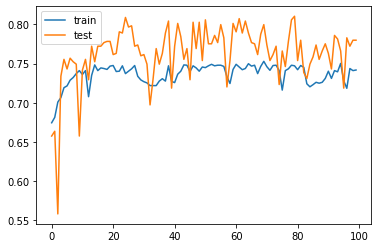

In [22]:
##Combining the data from present and previous training and testing data to use for our custom prediction

##USING HARMONIC MEAN for prediction
#Training without regularization

#first convert h

#Training the model with this ORCHESTRATED DATASET,

##With regularization and with precision and accuracy scores, classification report.and plots
import matplotlib
from matplotlib import pyplot

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
"""
Now, we Set up the logistic regression model with y_labels1 and  y_valid_labels1, the changed labels
"""
model = Sequential()
feature_vector=new_X_tr[1] #(any row of training data set)
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                
                input_dim=len(feature_vector)))  # input dimension = number of features your data has
          

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(new_X_tr, y_tr_labels, epochs=100, validation_data=(new_X_valid, y_valid_labels))


y_pred1 = model.predict(new_X_pres_valid, batch_size=64, verbose=1)
y_pred2 = model.predict(new_X_prev_valid, batch_size=64, verbose=1)

#y_pred=(y_pred1+y_pred2)/2
y_pred=(2*y_pred1*y_pred2)/(y_pred1 + y_pred2)
y_pred_bool = np.argmax(y_pred, axis=1)

'''
shape_of_tmp1=y_tmp1.shape
print("\n",  type(shape_of_tmp1), "\n Accessing shape tuple,dimension 1 (rows)= ", shape_of_tmp1[0], "\n dmension 2 (cols) = ", shape_of_tmp1[1])
length=shape_of_tmp1[0]
y_tmp2_modified=y_tmp2[0:length]

y_pred=(2*y_tmp1*y_tmp2_modified)/(y_tmp1+y_tmp2_modified)
#y_pred= (y_tmp1+y_tmp2_modified)/2
y_pred_bool = np.argmax(y_pred, axis=1)

'''
print("\n Classification Report, \n", classification_report(new_y_pres_valid, y_pred_bool), "\n")
#print("\n Classification Report, \n", classification_report(new_y_valid, y_pred_bool), "\n")


print("\n Macro scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account
#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='macro')) #computes accuracy for each label and then averages them, Doesn't take class imbalance into account

print("\n Micro Scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.
#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='micro')) #computes accuracy at global level, not for each label.

print("\n weighted Scores = \n")
print(precision_recall_fscore_support(new_y_pres_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label

#print(precision_recall_fscore_support(new_y_valid, y_pred_bool, average='weighted'))#computes accuracy for each label and then does weighted average of them, considers support of each label





pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
##For auc

from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
    

In [60]:
!pip install scikit-plot
import numpy as np

import scikitplot as skplt
import matplotlib.pyplot as plt

pred_prob=[]
pred_prob2=[]
for i in y_pred:
  pred_prob.append(i[0])
  pred_prob2.append(i[1])


pred_prob=np.asarray(pred_prob)
pred_prob=np.asarray(pred_prob2)

y_present_valid=np.asarray(min_y_pres_valid)

print(y_present_valid.shape, pred_prob.shape, y_present_valid.size)

shape_num=y_present_valid.size

y_present_valid=y_present_valid.reshape((shape_num,))

print(pred_prob.shape, y_present_valid.shape)



(327, 1) (327,) 327
(327,) (327,)


In [59]:
#y_true = new_y_pres_valid # ground truth labels
y_true = y_present_valid # ground truth labels
y_proba = pred_prob # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_proba)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

In [58]:
i=y_pred[1]
print(i[0],i[1])
j=y_pred[28]
print("\n ", j[0],j[1])

a=[1,4]
print(type(a))
a=np.asarray(a)
print(type(a))


print(new_y_pres_valid[3])
print(new_y_pres_valid.shape, pred_prob.shape,  y_present_valid.shape)

0.8114837 9.819878e-10

  0.68515736 0.30241287
<class 'list'>
<class 'numpy.ndarray'>
[0.]
(327, 1) (327,) (327,)


In [62]:
from sklearn import metrics

print("Accuracy", metrics.accuracy_score(y_present_valid, pred_prob))

ValueError: ignored

In [71]:
y_present_valid.dtype

print(y_present_valid[1:100])
print(y_present_valid.astype(int)[1:100])

print(np.any(y_present_valid!= y_present_valid.astype(int)))

[0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0.]
[0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0
 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0]
False


In [32]:
import numpy as np
np.isnan(y_pred)

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

In [74]:
##Using keras fuction to use roc curves

from keras.models import Sequential
from keras.layers import Dense

'''
feature_vector=new_X_tr[1] #(any row of training data set)
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=len(feature_vector)))  # input dimension = number of features your data has

'''
def build_model():
    model = Sequential()
    feature_vector=new_X_tr[1]
    model.add(Dense(20, input_dim=len(feature_vector), activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(new_X_tr, y_tr_labels, epochs=5, batch_size=100, verbose=1)

ValueError: ignored

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [76]:
def build_model():
    model = Sequential()
    feature_vector=new_X_tr[1]
    model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=len(feature_vector)))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(new_X_tr, y_tr_labels, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
2614/2614 [==============================] - 0s 170us/step - loss: 3.5273 - acc: 0.4499
Epoch 2/100
2614/2614 [==============================] - 0s 33us/step - loss: 3.3631 - acc: 0.5011
Epoch 3/100
2614/2614 [==============================] - 0s 29us/step - loss: 3.2092 - acc: 0.5367
Epoch 4/100
2614/2614 [==============================] - 0s 40us/step - loss: 3.0416 - acc: 0.5520
Epoch 5/100
2614/2614 [==============================] - 0s 37us/step - loss: 2.0021 - acc: 0.6297
Epoch 6/100
2614/2614 [==============================] - 0s 34us/step - loss: 0.7574 - acc: 0.7257
Epoch 7/100
2614/2614 [==============================] - 0s 28us/step - loss: 0.7066 - acc: 0.7387
Epoch 8/100
2614/2614 [==============================] - 0s 38us/step - loss: 0.6616 - acc: 0.7487
Epoch 9/100
2614/2614 [==============================] - 0s 37us/step - loss: 0.6290 - acc: 0.7510
Epoch 10/100
2614/2614 [==============================] - 0s 36us/step - loss: 0.6050 - acc: 0.7525
Epoch 11

In [85]:
#Only tradtional prediction using present tweets
from sklearn.metrics import roc_curve
y_pred_keras_tmp = keras_model.predict(new_X_valid)
print(y_pred_keras_tmp.shape)
pred_prob=[]
pred_prob2=[]
for i in y_pred_keras_tmp:
  pred_prob.append(i[0])
  pred_prob2.append(i[1])

y_pred_keras_2=np.asarray(pred_prob)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(new_y_valid, y_pred_keras_2)


(654, 2)


'\nnew_X_valid=np.concatenate((new_X_pres_valid, new_X_prev_valid), axis=0)\n\nnew_y_tr=np.concatenate((new_y_pres_tr, new_y_prev_tr), axis=0)\nnew_y_valid=np.concatenate((new_y_pres_valid, new_y_prev_valid), axis=0)\n'

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

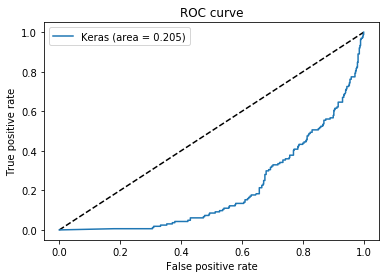

In [93]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [97]:
#USING CUSTOM PREDICTION  present tweets AND PREVIOUS TWEETS
from sklearn.metrics import roc_curve
y_pred_keras_tmp1 = keras_model.predict(new_X_pres_valid)
y_pred_keras_tmp2 = keras_model.predict(new_X_prev_valid)

print(y_pred_keras_tmp.shape)
pred_prob_pres=[]
pred_prob2_pres=[]
for i in y_pred_keras_tmp1:
  pred_prob_pres.append(i[0])
  pred_prob2_pres.append(i[1])


pred_prob_prev=[]
pred_prob2_prev=[]
for i in y_pred_keras_tmp2:
  pred_prob_prev.append(i[0])
  pred_prob2_prev.append(i[1])


print(len(y_pred_keras_tmp1), len(y_pred_keras_tmp2), len(pred_prob_pres),len(pred_prob_prev))

pred_prob=[0 for i in range(len(y_pred_keras_tmp1))]

for i in range(len(pred_prob)):
  pred_prob[i]=(pred_prob_pres[i] + pred_prob_prev[i])/2


y_pred_keras_2=np.asarray(pred_prob)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(new_y_pres_valid, y_pred_keras_2)


(654, 2)
327 327 327 327


In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

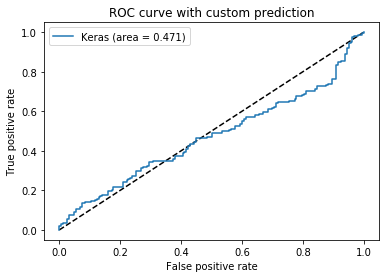

In [99]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve with custom prediction')
plt.legend(loc='best')
plt.show()


In [87]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(new_X_tr, y_tr_labels)

y_pred_rf = rf.predict_proba(new_X_valid)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(new_y_valid, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

TypeError: ignored

In [91]:
type(rf.predict_proba(new_X_valid))

a=rf.predict_proba(new_X_valid)
print(len(a), a[0])

2 [[0.2097267  0.7902733 ]
 [0.29506953 0.70493047]
 [0.30312069 0.69687931]
 ...
 [0.13293307 0.86706693]
 [0.18472808 0.81527192]
 [0.14930051 0.85069949]]


In [80]:
print(len(new_X_tr), len(new_y_valid), len(y_pred_keras))

2614 654 1308
